# Extracting Principal Components

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('wine.csv')

In [4]:
df.shape

(178, 14)

In [5]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
X = df.drop(['class'], axis=1)

In [10]:
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [53]:
# we don't know what the X_test data is supposed to be
# you want to scale the test data to the train data
# in real world, we do not see the actual data that flows in
# X_test is transformed using mean and variance data captured in X_train
sc.fit(X_train)
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
print(np.round(pca.explained_variance_ratio_, 3))

[ 0.359  0.187]


In [57]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.128,-0.256,-0.022,-0.244,0.148,0.385,0.420,-0.299,0.308,-0.119,0.299,0.384,0.276
1,-0.493,-0.190,-0.317,0.035,-0.262,-0.096,-0.015,-0.076,-0.074,-0.534,0.281,0.143,-0.381


In [64]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [65]:
pca.fit_transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ..., 
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [66]:
print(np.round(pca.explained_variance_ratio_, 3))

[ 0.359  0.187  0.116  0.074  0.067  0.049  0.042  0.027  0.023  0.019
  0.017  0.013  0.008]


In [67]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.35900066,  0.54592   ,  0.66198557,  0.73570273,  0.80224132,
        0.85078714,  0.89273756,  0.91957678,  0.94305138,  0.96194872,
        0.97910815,  0.99173743,  1.        ])

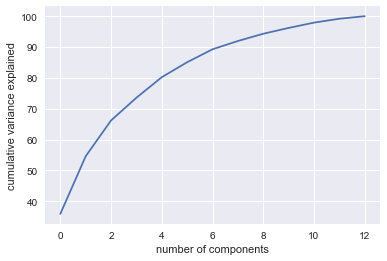

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')

In [72]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0, len(res))]

In [75]:
df1 = pd.DataFrame(res, columns=df.columns[1:],
                   index=index_name)[0:4]

In [81]:
df1.T.sort_values(by='PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3
Malic acid,-3.615327,-0.482177,1.275033,-2.496962
Alcohol,-1.166027,-3.862612,2.283538,-1.678507
Proline,-0.755592,-0.122403,0.415850,-0.791136
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927
Hue,-0.112150,0.504570,0.480180,-0.319599
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823
Magnesium,0.221634,-0.226540,0.215798,-0.003420
Color intensity,0.262397,-0.453600,-0.777822,-0.123055
Nonflavanoid phenols,0.918085,-0.113136,-0.678263,0.150849
